In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
import time

## EDA

In [2]:
def d_types_report(df):
    columns=[]
    d_types=[]
    uniques=[]
    n_uniques=[]
    null_values=[]
    null_values_percentage=[]
    rows = df.shape[0]
    
    for i in df.columns:
        columns.append(i)
        d_types.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
        null_values.append(df[i].isna().sum())
        null_values_percentage.append(null_values[-1] * 100 / rows)

    return pd.DataFrame({"Columns": columns, "Data_Types": d_types, "Unique_values": uniques, "N_Uniques": n_uniques,  "Null_Values": null_values, "Null_Values_percentage": null_values_percentage})

### 1. Male Team Analysis

In [ ]:
men_teams = pd.read_csv("ML_dataset/MTeams.csv")
print(men_teams.shape)
men_teams.head() 

(380, 4)


,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2025
1,1102,Air Force,1985,2025
2,1103,Akron,1985,2025
3,1104,Alabama,1985,2025
4,1105,Alabama A&M,2000,2025


In [ ]:
d_types_report(men_teams)

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,TeamID,int64,"[1101, 1102, 1103, 1104, 1105]",380,0,0.0
1,TeamName,object,"[Abilene Chr, Air Force, Akron, Alabama, Alaba...",380,0,0.0
2,FirstD1Season,int64,"[2014, 1985, 2000, 1999, 1987]",32,0,0.0
3,LastD1Season,int64,"[2025, 1991, 1987, 2006, 1992]",14,0,0.0


In [ ]:
men_teams = men_teams[men_teams['LastD1Season'] == 2025] 
men_teams

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2025
1,1102,Air Force,1985,2025
2,1103,Akron,1985,2025
3,1104,Alabama,1985,2025
4,1105,Alabama A&M,2000,2025
...,...,...,...,...
375,1476,Stonehill,2023,2025
376,1477,East Texas A&M,2023,2025
377,1478,Le Moyne,2024,2025
378,1479,Mercyhurst,2025,2025


### 2. Seasons

In [7]:
men_seasons = pd.read_csv("ML_dataset/MSeasons.csv")
print(men_seasons.head())
d_types_report(men_seasons)

   Season     DayZero RegionW    RegionX    RegionY    RegionZ
0    1985  10/29/1984    East       West    Midwest  Southeast
1    1986  10/28/1985    East    Midwest  Southeast       West
2    1987  10/27/1986    East  Southeast    Midwest       West
3    1988  11/02/1987    East    Midwest  Southeast       West
4    1989  10/31/1988    East       West    Midwest  Southeast


,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,Season,int64,"[1985, 1986, 1987, 1988, 1989]",41,0,0.0
1,DayZero,object,"[10/29/1984, 10/28/1985, 10/27/1986, 11/02/198...",41,0,0.0
2,RegionW,object,"[East, Atlanta, Albuquerque, NA1]",4,0,0.0
3,RegionX,object,"[West, Midwest, Southeast, South, Phoenix]",8,0,0.0
4,RegionY,object,"[Midwest, Southeast, South, EastRutherford, Au...",7,0,0.0
5,RegionZ,object,"[Southeast, West, South, StLouis, Syracuse]",8,0,0.0


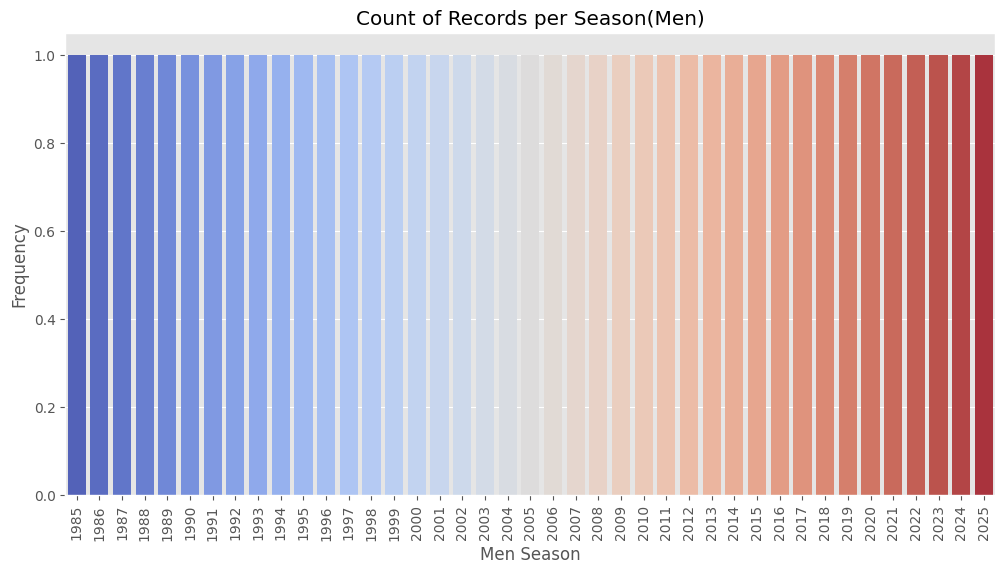

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Season", data=men_seasons, palette="coolwarm")
plt.xlabel("Men Season")
plt.ylabel("Frequency")
plt.title("Count of Records per Season(Men)")
plt.xticks(rotation=90)
plt.show()

The graph shows an equal distribution of records across all seasons from 1985 to 2025, with a smooth transition from blue (earlier years) to red (recent years) using the coolwarm palette. This indicates no missing data for any season.

### 3. MNCAA Tourney Seeds

In [ ]:
men_seeds = pd.read_csv("ML_dataset/MNCAATourneySeeds.csv")
print(men_seeds.head())
men_seeds['SeedValue'] = men_seeds['Seed'].str.extract('(\d+)').astype(int)
men_seeds['Region'] = men_seeds['Seed'].str[0]
men_seeds = men_seeds.drop('Seed', axis=1)
men_seeds.head()

   Season Seed  TeamID
0    1985  W01    1207
1    1985  W02    1210
2    1985  W03    1228
3    1985  W04    1260
4    1985  W05    1374


,Season,TeamID,SeedValue,Region
0,1985,1207,1,W
1,1985,1210,2,W
2,1985,1228,3,W
3,1985,1260,4,W
4,1985,1374,5,W


In [10]:
d_types_report(men_seeds)

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,Season,int64,"[1985, 1986, 1987, 1988, 1989]",40,0,0.0
1,TeamID,int64,"[1207, 1210, 1228, 1260, 1374]",313,0,0.0
2,SeedValue,int64,"[1, 2, 3, 4, 5]",16,0,0.0
3,Region,object,"[W, X, Y, Z]",4,0,0.0


### 4. Regular Season Compact Results

In [11]:
men_regular_results = pd.read_csv("ML_dataset/MRegularSeasonCompactResults.csv")
print(men_regular_results.head())
d_types_report(men_regular_results)

   Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1985      20     1228      81     1328      64    N      0
1    1985      25     1106      77     1354      70    H      0
2    1985      25     1112      63     1223      56    H      0
3    1985      25     1165      70     1432      54    H      0
4    1985      25     1192      86     1447      74    H      0


,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,Season,int64,"[1985, 1986, 1987, 1988, 1989]",41,0,0.0
1,DayNum,int64,"[20, 25, 26, 27, 28]",133,0,0.0
2,WTeamID,int64,"[1228, 1106, 1112, 1165, 1192]",380,0,0.0
3,WScore,int64,"[81, 77, 63, 70, 86]",130,0,0.0
4,LTeamID,int64,"[1328, 1354, 1223, 1432, 1447]",380,0,0.0
5,LScore,int64,"[64, 70, 56, 54, 74]",119,0,0.0
6,WLoc,object,"[N, H, A]",3,0,0.0
7,NumOT,int64,"[0, 3, 1, 2, 4]",7,0,0.0


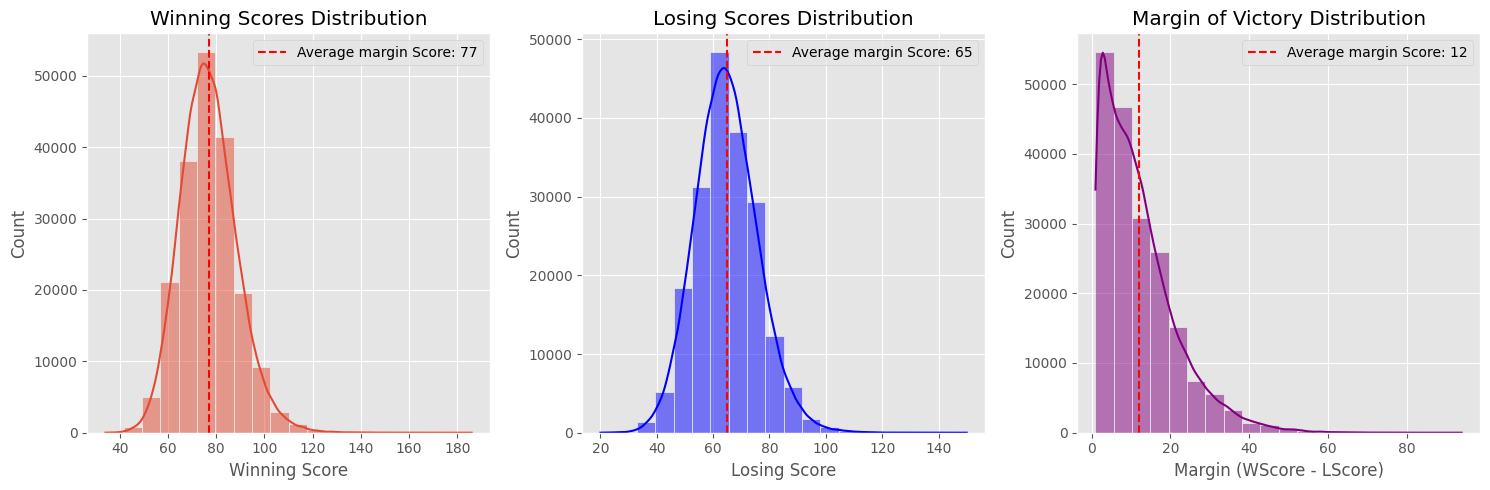

In [ ]:
men_regular_results['Margin'] = men_regular_results['WScore'] - men_regular_results['LScore']

avg_winning_score = round(men_regular_results['WScore'].mean())

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(x=men_regular_results['WScore'], kde=True, bins=20)
plt.axvline(x=avg_winning_score, color='red', linestyle='--', label=f'Average margin Score: {avg_winning_score}')
plt.title("Winning Scores Distribution")
plt.xlabel("Winning Score")
plt.legend()

avg_lossing_score = round(men_regular_results['LScore'].mean())
plt.subplot(1, 3, 2)
sns.histplot(x=men_regular_results['LScore'], kde=True, color='blue', bins=20)
plt.axvline(x=avg_lossing_score, color='red', linestyle='--', label=f'Average margin Score: {avg_lossing_score}')
plt.title("Losing Scores Distribution")
plt.xlabel("Losing Score")
plt.legend()

avg_margin_score = round(men_regular_results['Margin'].mean())
plt.subplot(1, 3, 3)
sns.histplot(x=men_regular_results['Margin'], kde=True, color='purple', bins=20)
plt.axvline(x=avg_margin_score, color='red', linestyle='--', label=f'Average margin Score: {avg_margin_score}')
plt.title("Margin of Victory Distribution")
plt.xlabel("Margin (WScore - LScore)")
plt.tight_layout()

plt.legend()
plt.show()

Graph 1: Regular Season Winning Score (Green): Most winning teams score in the low-to-mid 70s.</br>
Graph 2: Regular Season Losing Score (Red): Losing teams typically score in the low-to-mid 60s.</br>
Graph 3: Regular Season Margin (Purple): The average margin of victory is roughly 8–12 points.

In [13]:
men_regular_results.describe(include='all')

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,Margin
count,192930.000000,192930.000000,192930.000000,192930.000000,192930.000000,192930.000000,192930,192930.000000,192930.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,H,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,113922,NaN,NaN
mean,2006.381340,73.863246,1287.596553,76.863567,1283.396107,64.785658,NaN,0.049064,12.077909
std,11.677788,34.301312,104.939008,11.826222,105.126847,11.197670,NaN,0.259297,9.393360
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,NaN,0.000000,1.000000
25%,1997.000000,45.000000,1199.000000,69.000000,1191.000000,57.000000,NaN,0.000000,5.000000
50%,2007.000000,76.000000,1285.000000,76.000000,1281.000000,64.000000,NaN,0.000000,10.000000
75%,2016.000000,103.000000,1380.000000,84.000000,1375.000000,72.000000,NaN,0.000000,17.000000


In [14]:
men_regular_results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,Margin
0,1985,20,1228,81,1328,64,N,0,17
1,1985,25,1106,77,1354,70,H,0,7
2,1985,25,1112,63,1223,56,H,0,7
3,1985,25,1165,70,1432,54,H,0,16
4,1985,25,1192,86,1447,74,H,0,12
...,...,...,...,...,...,...,...,...,...
192925,2025,132,1196,86,1397,77,N,0,9
192926,2025,132,1272,84,1412,72,N,0,12
192927,2025,132,1276,59,1458,53,N,0,6
192928,2025,132,1433,68,1206,63,N,0,5


### 5. Tournament Result

In [15]:
men_tourney_results = pd.read_csv("ML_dataset/MNCAATourneyCompactResults.csv")
print(men_tourney_results.head())
d_types_report(men_tourney_results)

   Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1985     136     1116      63     1234      54    N      0
1    1985     136     1120      59     1345      58    N      0
2    1985     136     1207      68     1250      43    N      0
3    1985     136     1229      58     1425      55    N      0
4    1985     136     1242      49     1325      38    N      0


,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,Season,int64,"[1985, 1986, 1987, 1988, 1989]",39,0,0.0
1,DayNum,int64,"[136, 137, 138, 139, 143]",15,0,0.0
2,WTeamID,int64,"[1116, 1120, 1207, 1229, 1242]",217,0,0.0
3,WScore,int64,"[63, 59, 68, 58, 49]",78,0,0.0
4,LTeamID,int64,"[1234, 1345, 1250, 1425, 1325]",309,0,0.0
5,LScore,int64,"[54, 58, 43, 55, 38]",73,0,0.0
6,WLoc,object,[N],1,0,0.0
7,NumOT,int64,"[0, 1, 3, 2]",4,0,0.0


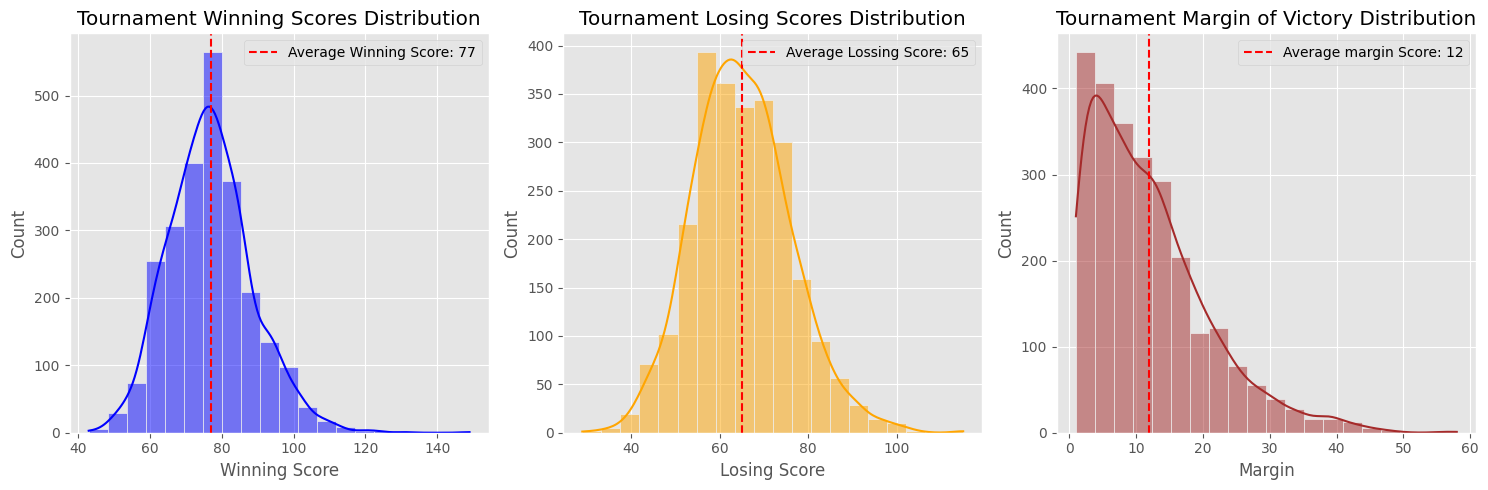

    Season  Count of Unique Teams
0     1985                     32
1     1986                     32
2     1987                     32
3     1988                     32
4     1989                     32
5     1990                     32
6     1991                     32
7     1992                     32
8     1993                     32
9     1994                     32
10    1995                     32
11    1996                     32
12    1997                     32
13    1998                     32
14    1999                     32
15    2000                     32
16    2001                     33
17    2002                     33
18    2003                     33
19    2004                     33
20    2005                     33
21    2006                     33
22    2007                     33
23    2008                     33
24    2009                     33
25    2010                     33
26    2011                     35
27    2012                     35
28    2013    

In [ ]:
men_tourney_results['Margin'] = men_tourney_results['WScore'] - men_tourney_results['LScore']


average_winning_score = round(men_tourney_results['WScore'].mean())

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(men_tourney_results['WScore'], kde=True, color='blue', bins=20)
plt.axvline(x=average_winning_score, color='red', linestyle='--', label=f'Average Winning Score: {average_winning_score}')
plt.title("Tournament Winning Scores Distribution")
plt.legend()
plt.xlabel("Winning Score")

average_lossing_score = round(men_tourney_results['LScore'].mean())
plt.subplot(1, 3, 2)
sns.histplot(men_tourney_results['LScore'], kde=True, color='orange', bins=20)
plt.axvline(x=average_lossing_score, color='red', linestyle='--', label=f'Average Lossing Score: {average_lossing_score}')
plt.title("Tournament Losing Scores Distribution")
plt.legend()
plt.xlabel("Losing Score")

average_margin_score = round(men_tourney_results['Margin'].mean())
plt.subplot(1, 3, 3)
sns.histplot(men_tourney_results['Margin'], kde=True, color='brown', bins=20)
plt.axvline(x=average_margin_score, color='red', linestyle='--', label=f'Average margin Score: {average_margin_score}')
plt.title("Tournament Margin of Victory Distribution")
plt.xlabel("Margin")
plt.tight_layout()
plt.legend()
plt.show()

unique_teams_per_season = men_tourney_results.groupby('Season')['WTeamID'].nunique()
unique_teams_per_season_df = unique_teams_per_season.reset_index(name='Count of Unique Teams')
print(unique_teams_per_season_df)

Graph 1: Tournament Winning Score (Blue): Tournament winners often score in the 70s as well. </br>
Graph 2: Tournament Losing Score (Orange): Tournament losers usually fall in the high 50s to mid 60s range. </br>
Graph 3: Tournament Margin (Brown): Tournament games are often decided by around 7–10 points on average. </br>

In [ ]:
men_tourney_results.describe(include='all')

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,Margin
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518,2518.000000,2518.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,2518,NaN,NaN
mean,2004.374106,139.150913,1284.984114,76.867355,1291.419778,65.077442,NaN,0.066720,11.789913
std,11.447616,4.218254,101.039491,11.768184,103.424835,11.043525,NaN,0.278191,8.876539
min,1985.000000,134.000000,1101.000000,43.000000,1101.000000,29.000000,NaN,0.000000,1.000000
25%,1994.250000,136.000000,1207.000000,69.000000,1209.000000,58.000000,NaN,0.000000,5.000000
50%,2004.000000,137.000000,1276.000000,76.000000,1286.500000,64.000000,NaN,0.000000,10.000000
75%,2014.000000,139.000000,1385.000000,84.000000,1387.000000,72.000000,NaN,0.000000,16.750000


In [18]:
men_tourney_results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,Margin
0,1985,136,1116,63,1234,54,N,0,9
1,1985,136,1120,59,1345,58,N,0,1
2,1985,136,1207,68,1250,43,N,0,25
3,1985,136,1229,58,1425,55,N,0,3
4,1985,136,1242,49,1325,38,N,0,11
...,...,...,...,...,...,...,...,...,...
2513,2024,146,1301,76,1181,64,N,0,12
2514,2024,146,1345,72,1397,66,N,0,6
2515,2024,152,1163,86,1104,72,N,0,14
2516,2024,152,1345,63,1301,50,N,0,13


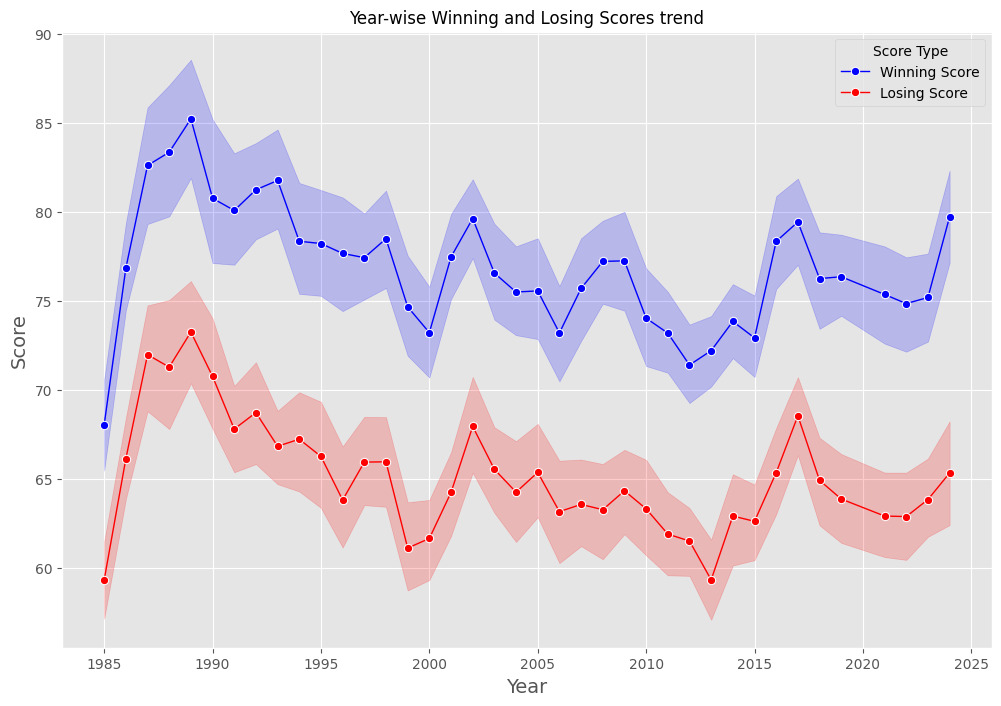

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Season', y='WScore', data=men_tourney_results, label='Winning Score', marker='o', color='blue', lw=1)
sns.lineplot(x='Season', y='LScore', data=men_tourney_results, label='Losing Score', marker='o', color='red', lw=1)

plt.title("Year-wise Winning and Losing Scores trend", fontsize=12)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.legend(title="Score Type")
plt.show()

### Merge Regular Season and Tournery Compact results of Mens

In [ ]:
men_regular_results["type"] = "regular"
men_tourney_results["type"] = "tournament"

common_columns = set(men_regular_results.columns).intersection(set(men_tourney_results.columns))
men_regular_results = men_regular_results[list(common_columns)]
men_tourney_results = men_tourney_results[list(common_columns)]
print(f'Common Columns:{common_columns}')

m_combined = pd.concat([men_regular_results, men_tourney_results], ignore_index=True)
m_combined

Common Columns:{'type', 'LScore', 'DayNum', 'Margin', 'NumOT', 'WLoc', 'LTeamID', 'Season', 'WTeamID', 'WScore'}


,type,LScore,DayNum,Margin,NumOT,WLoc,LTeamID,Season,WTeamID,WScore
0,regular,64,20,17,0,N,1328,1985,1228,81
1,regular,70,25,7,0,H,1354,1985,1106,77
2,regular,56,25,7,0,H,1223,1985,1112,63
3,regular,54,25,16,0,H,1432,1985,1165,70
4,regular,74,25,12,0,H,1447,1985,1192,86
...,...,...,...,...,...,...,...,...,...,...
195443,tournament,64,146,12,0,N,1181,2024,1301,76
195444,tournament,66,146,6,0,N,1397,2024,1345,72
195445,tournament,72,152,14,0,N,1104,2024,1163,86
195446,tournament,50,152,13,0,N,1301,2024,1345,63


In [21]:
d_types_report(m_combined)

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,type,object,"[regular, tournament]",2,0,0.0
1,LScore,int64,"[64, 70, 56, 54, 74]",119,0,0.0
2,DayNum,int64,"[20, 25, 26, 27, 28]",148,0,0.0
3,Margin,int64,"[17, 7, 16, 12, 1]",82,0,0.0
4,NumOT,int64,"[0, 3, 1, 2, 4]",7,0,0.0
5,WLoc,object,"[N, H, A]",3,0,0.0
6,LTeamID,int64,"[1328, 1354, 1223, 1432, 1447]",380,0,0.0
7,Season,int64,"[1985, 1986, 1987, 1988, 1989]",41,0,0.0
8,WTeamID,int64,"[1228, 1106, 1112, 1165, 1192]",380,0,0.0
9,WScore,int64,"[81, 77, 63, 70, 86]",130,0,0.0


### 6. Regular Season and Tourney Detailed Results

In [22]:
men_detailed_results = pd.read_csv("ML_dataset/MRegularSeasonDetailedResults.csv")
men_tourney_detailed_results = pd.read_csv("ML_dataset/MNCAATourneyDetailedResults.csv")
women_detailed_results = pd.read_csv("ML_dataset/WRegularSeasonDetailedResults.csv")
women_tourney_detailed_results = pd.read_csv("ML_dataset/WNCAATourneyDetailedResults.csv")

In [23]:
men_detailed_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [24]:
women_tourney_detailed_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2010,138,3124,69,3201,55,N,0,28,57,...,34,3,5,17,19,12,18,4,1,18
1,2010,138,3173,67,3395,66,N,0,23,59,...,27,14,15,18,26,8,8,8,6,22
2,2010,138,3181,72,3214,37,H,0,26,57,...,15,3,8,10,21,4,16,6,4,20
3,2010,138,3199,75,3256,61,H,0,25,63,...,20,17,22,16,21,13,16,5,4,24
4,2010,138,3207,62,3265,42,N,0,24,68,...,26,11,17,16,22,9,10,3,4,12


In [ ]:
def compute_features(df):    
    epsilon = 1e-6
    df['Possession_Control'] = df['WOR'] + df['WDR'] + df['WStl'] - df['WTO']
    
    df['Shooting_Efficiency'] = (
        df['WFGM'] + 0.5 * df['WFGM3'] + 0.5 * df['WFTM']
    ) / (df['WFGA'] + 0.5 * df['WFTA'] + epsilon)

    df['Assist_Ratio'] = df['WAst'] / (df['WFGM'] + df['WFTM'] + epsilon)

    df['Balanced_Score'] = (
        0.4 * df['Shooting_Efficiency'] +
        0.4 * df['Possession_Control'] +
        0.2 * df['Assist_Ratio']
    )
    
    columns_to_keep = ['Season', 'WTeamID', 'LTeamID', 'WScore', 'DayNum', 'LScore','WLoc','NumOT', 'Possession_Control', 
                       'Shooting_Efficiency', 'Assist_Ratio', 'Balanced_Score']
    return df[columns_to_keep]

men_regular = compute_features(men_detailed_results)
men_tourney = compute_features(men_tourney_detailed_results)
women_regular = compute_features(women_detailed_results)
women_tourney = compute_features(women_tourney_detailed_results)

men_data = pd.concat([men_regular, men_tourney])
women_data = pd.concat([women_regular, women_tourney])

final_data = pd.concat([men_data, women_data])

final_data.to_csv('season_tournament_detailed_result.csv', index=False)

season_tournament_detailed_result = pd.read_csv("season_tournament_detailed_result.csv")
season_tournament_detailed_result

,Season,WTeamID,LTeamID,WScore,DayNum,LScore,WLoc,NumOT,Possession_Control,Shooting_Efficiency,Assist_Ratio,Balanced_Score
0,2003,1104,1328,68,10,62,N,0,22,0.507463,0.342105,9.071406
1,2003,1272,1393,70,10,63,N,0,34,0.489510,0.444444,13.884693
2,2003,1266,1437,73,11,61,N,0,38,0.503448,0.365854,15.474550
3,2003,1296,1457,56,11,50,N,0,27,0.523364,0.314286,11.072203
4,2003,1400,1208,77,11,71,N,0,29,0.570370,0.292683,11.886685
...,...,...,...,...,...,...,...,...,...,...,...,...
202861,2024,3163,3425,80,147,73,A,0,29,0.559441,0.377778,11.899332
202862,2024,3234,3261,94,147,87,H,0,27,0.587500,0.326531,11.100306
202863,2024,3234,3163,71,151,69,N,0,23,0.537879,0.324324,9.480016
202864,2024,3376,3301,78,151,59,N,0,39,0.573529,0.486486,15.926709


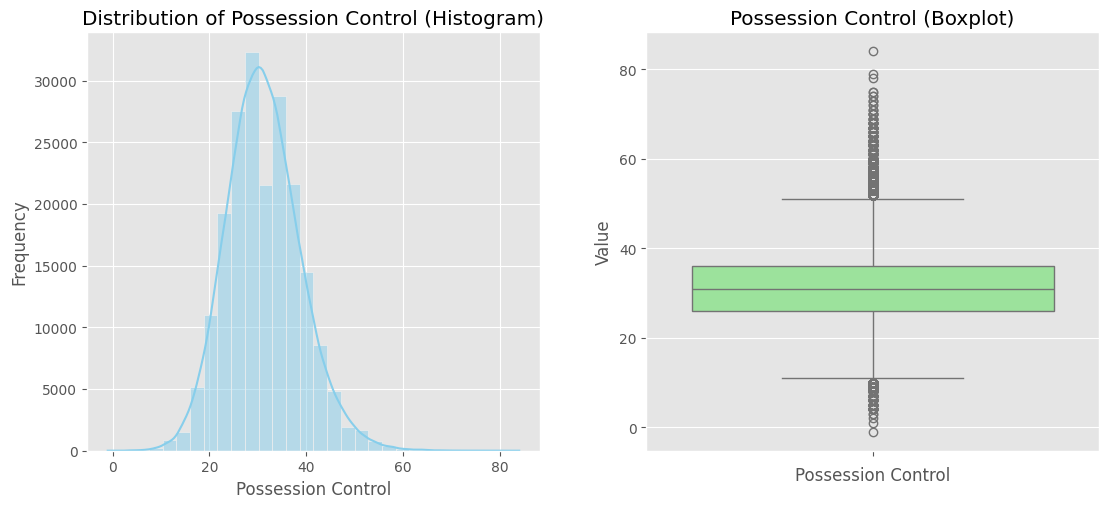

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(season_tournament_detailed_result['Possession_Control'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title("Distribution of Possession Control (Histogram)")
axes[0].set_xlabel("Possession Control")
axes[0].set_ylabel("Frequency")

sns.boxplot(y=season_tournament_detailed_result['Possession_Control'], color='lightgreen', ax=axes[1])
axes[1].set_title("Possession Control (Boxplot)")
axes[1].set_xlabel("Possession Control")
axes[1].set_ylabel("Value")

plt.tight_layout(pad=4)
plt.show()

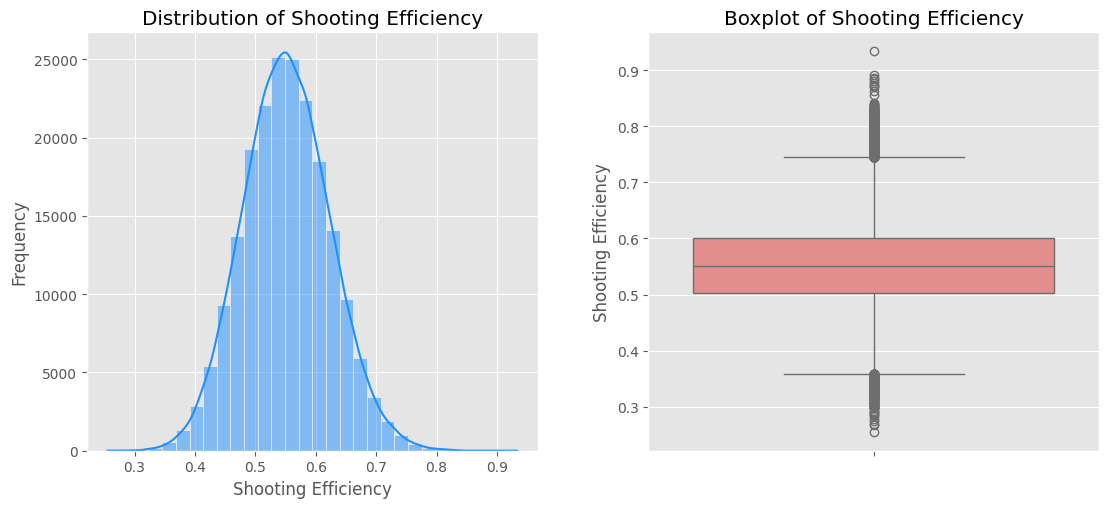

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(season_tournament_detailed_result['Shooting_Efficiency'], bins=30, kde=True, color='dodgerblue', ax=axes[0])
axes[0].set_title("Distribution of Shooting Efficiency")
axes[0].set_xlabel("Shooting Efficiency")
axes[0].set_ylabel("Frequency")

sns.boxplot(y=season_tournament_detailed_result['Shooting_Efficiency'], color='lightcoral', ax=axes[1])
axes[1].set_title("Boxplot of Shooting Efficiency")
axes[1].set_ylabel("Shooting Efficiency")

plt.tight_layout(pad=4)
plt.show()

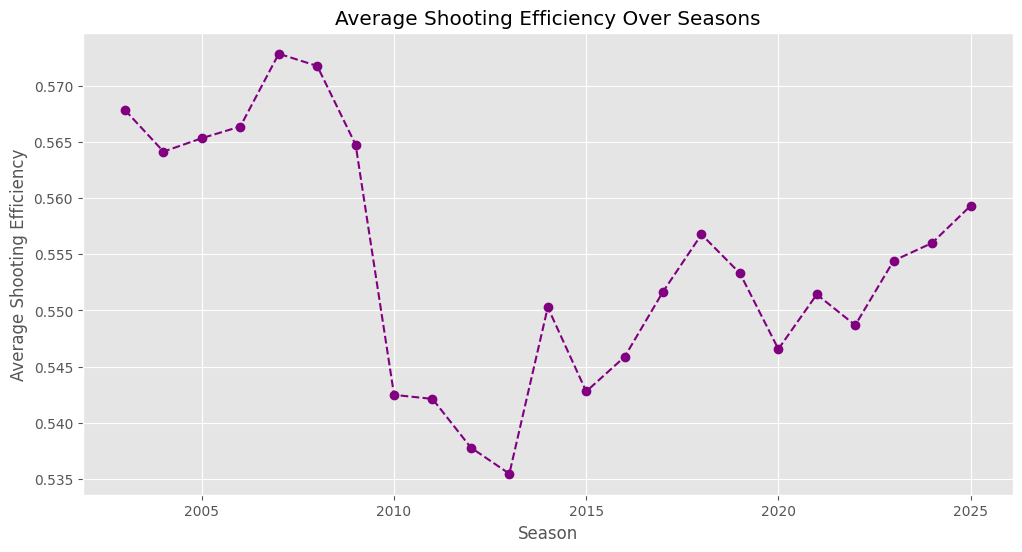

    Season  Average Shooting Frequency
0     2003                       56.78
1     2004                       56.42
2     2005                       56.53
3     2006                       56.64
4     2007                       57.29
5     2008                       57.18
6     2009                       56.48
7     2010                       54.25
8     2011                       54.21
9     2012                       53.78
10    2013                       53.55
11    2014                       55.03
12    2015                       54.28
13    2016                       54.59
14    2017                       55.17
15    2018                       55.68
16    2019                       55.33
17    2020                       54.66
18    2021                       55.14
19    2022                       54.87
20    2023                       55.44
21    2024                       55.60
22    2025                       55.93


In [28]:
if 'Season' in season_tournament_detailed_result.columns:
    avg_shoot_eff_by_season = season_tournament_detailed_result.groupby('Season')['Shooting_Efficiency'].mean()
    
    plt.figure(figsize=(12, 6))
    plt.plot(avg_shoot_eff_by_season.index, avg_shoot_eff_by_season.values, marker='o', linestyle='--', color='purple')
    plt.title("Average Shooting Efficiency Over Seasons")
    plt.xlabel("Season")
    plt.ylabel("Average Shooting Efficiency")
    plt.grid(True)
    plt.show()
    
    avg_shoot_eff_by_season = 100*avg_shoot_eff_by_season.round(4)
    tabl_avg_shoot = avg_shoot_eff_by_season.reset_index(name='Average Shooting Frequency')
    print(tabl_avg_shoot)

## Women Teams Analysis

In [ ]:
women_teams = pd.read_csv("ML_dataset/WTeams.csv")
women_seasons = pd.read_csv("ML_dataset/WSeasons.csv")
women_seeds = pd.read_csv("ML_dataset/WNCAATourneySeeds.csv")
women_regular_results = pd.read_csv("ML_dataset/WRegularSeasonCompactResults.csv")
women_tourney_results = pd.read_csv("ML_dataset/WNCAATourneyCompactResults.csv")

### 1. Team Information

In [30]:
women_teams.head()

,TeamID,TeamName
0,3101,Abilene Chr
1,3102,Air Force
2,3103,Akron
3,3104,Alabama
4,3105,Alabama A&M


In [31]:
d_types_report(women_teams)

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,TeamID,int64,"[3101, 3102, 3103, 3104, 3105]",378,0,0.0
1,TeamName,object,"[Abilene Chr, Air Force, Akron, Alabama, Alaba...",378,0,0.0


### 2. Seasons

In [33]:
women_seasons.head()

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1998,10/27/1997,East,Midwest,Mideast,West
1,1999,10/26/1998,East,Mideast,Midwest,West
2,2000,11/01/1999,East,Midwest,Mideast,West
3,2001,10/30/2000,East,Midwest,Mideast,West
4,2002,10/29/2001,East,West,Mideast,Midwest


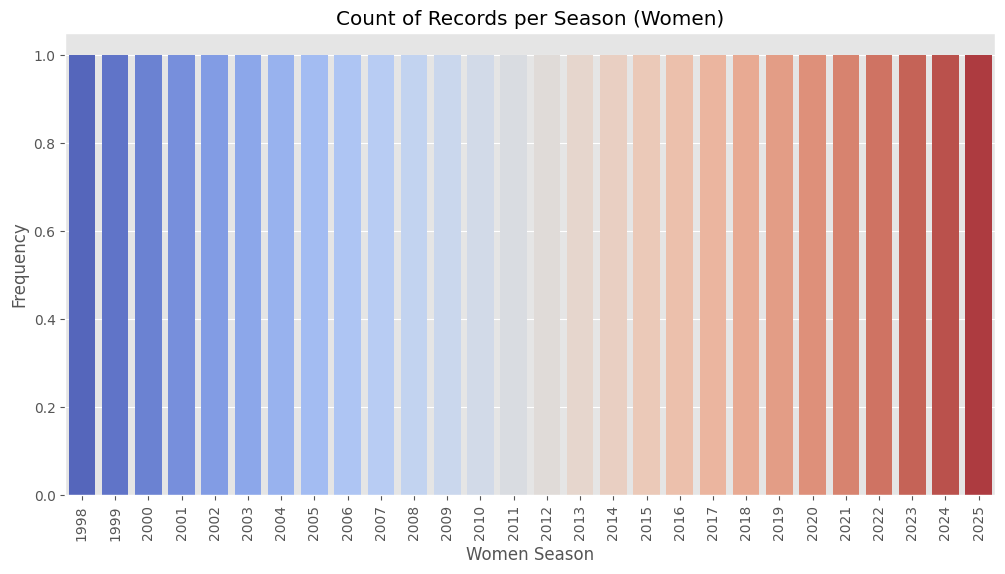

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Season", data=women_seasons, palette="coolwarm")
plt.xlabel("Women Season")
plt.ylabel("Frequency")
plt.title("Count of Records per Season (Women)")
plt.xticks(rotation=90)
plt.show()

### 3. MNCAA Tourney Seeds

In [35]:
women_seeds.head()

,Season,Seed,TeamID
0,1998,W01,3330
1,1998,W02,3163
2,1998,W03,3112
3,1998,W04,3301
4,1998,W05,3272


### 4. Regular Results

In [36]:
women_regular_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,18,3104,91,3202,41,H,0
1,1998,18,3163,87,3221,76,H,0
2,1998,18,3222,66,3261,59,H,0
3,1998,18,3307,69,3365,62,H,0
4,1998,18,3349,115,3411,35,H,0


In [37]:
women_regular_results.describe(include='all')

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
count,137028.000000,137028.000000,137028.000000,137028.000000,137028.000000,137028.000000,137028,137028.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,H,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,77593,NaN
mean,2011.963891,71.113962,3285.091916,71.916856,3285.465766,57.522185,NaN,0.039809
std,7.937326,35.400994,104.114611,11.366642,105.602927,10.795358,NaN,0.228170
min,1998.000000,0.000000,3101.000000,30.000000,3101.000000,11.000000,NaN,0.000000
25%,2005.000000,40.000000,3196.000000,64.000000,3193.000000,50.000000,NaN,0.000000
50%,2012.000000,75.000000,3282.000000,71.000000,3285.000000,57.000000,NaN,0.000000
75%,2019.000000,102.000000,3377.000000,79.000000,3377.000000,64.000000,NaN,0.000000


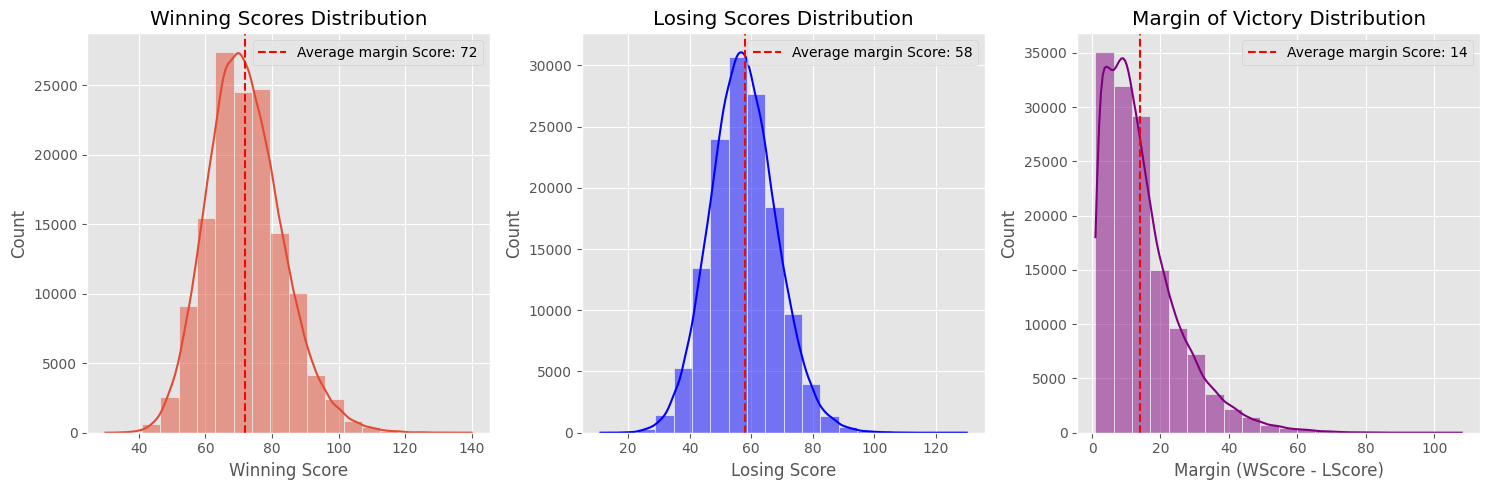

In [ ]:
women_regular_results['Margin'] = women_regular_results['WScore'] - women_regular_results['LScore']

avg_win_score = round(women_regular_results['WScore'].mean())

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(x=women_regular_results['WScore'], kde=True, bins=20)
plt.axvline(x=avg_win_score, color='red', linestyle='--', label=f'Average margin Score: {avg_win_score}')
plt.title("Winning Scores Distribution")
plt.xlabel("Winning Score")
plt.legend()

avg_loss_score = round(women_regular_results['LScore'].mean())
plt.subplot(1, 3, 2)
sns.histplot(x=women_regular_results['LScore'], kde=True, color='blue', bins=20)
plt.axvline(x=avg_loss_score, color='red', linestyle='--', label=f'Average margin Score: {avg_loss_score}')
plt.title("Losing Scores Distribution")
plt.xlabel("Losing Score")
plt.legend()

avg_margin_scr = round(women_regular_results['Margin'].mean())
plt.subplot(1, 3, 3)
sns.histplot(x=women_regular_results['Margin'], kde=True, color='purple', bins=20)
plt.axvline(x=avg_margin_scr, color='red', linestyle='--', label=f'Average margin Score: {avg_margin_scr}')
plt.title("Margin of Victory Distribution")
plt.xlabel("Margin (WScore - LScore)")
plt.tight_layout()

plt.legend()
plt.show()

Graph 1: *Tournament Winning Score (Blue):* Tournament winners often score in the 70s as well.  
Graph 2: *Tournament Losing Score (Orange):* Tournament losers usually fall in the high 50s to mid 70s range.  
Graph 3: *Tournament Margin (Brown):* Tournament games are often decided by around 7–20 points on average.

### 5. Tournament Results

In [39]:
women_tourney_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,137,3104,94,3422,46,H,0
1,1998,137,3112,75,3365,63,H,0
2,1998,137,3163,93,3193,52,H,0
3,1998,137,3198,59,3266,45,H,0
4,1998,137,3203,74,3208,72,A,0


In [40]:
women_tourney_results.describe(include='all')

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650,1650.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,853,NaN
mean,2010.743636,140.680000,3285.878788,75.750303,3287.456364,59.164848,NaN,0.024242
std,7.776383,4.044855,97.116198,11.331146,99.845312,10.990518,NaN,0.165250
min,1998.000000,135.000000,3104.000000,47.000000,3101.000000,21.000000,NaN,0.000000
25%,2004.000000,138.000000,3200.000000,68.000000,3208.000000,52.000000,NaN,0.000000
50%,2011.000000,139.000000,3280.000000,75.000000,3281.000000,59.000000,NaN,0.000000
75%,2017.000000,141.000000,3376.000000,83.000000,3377.000000,67.000000,NaN,0.000000


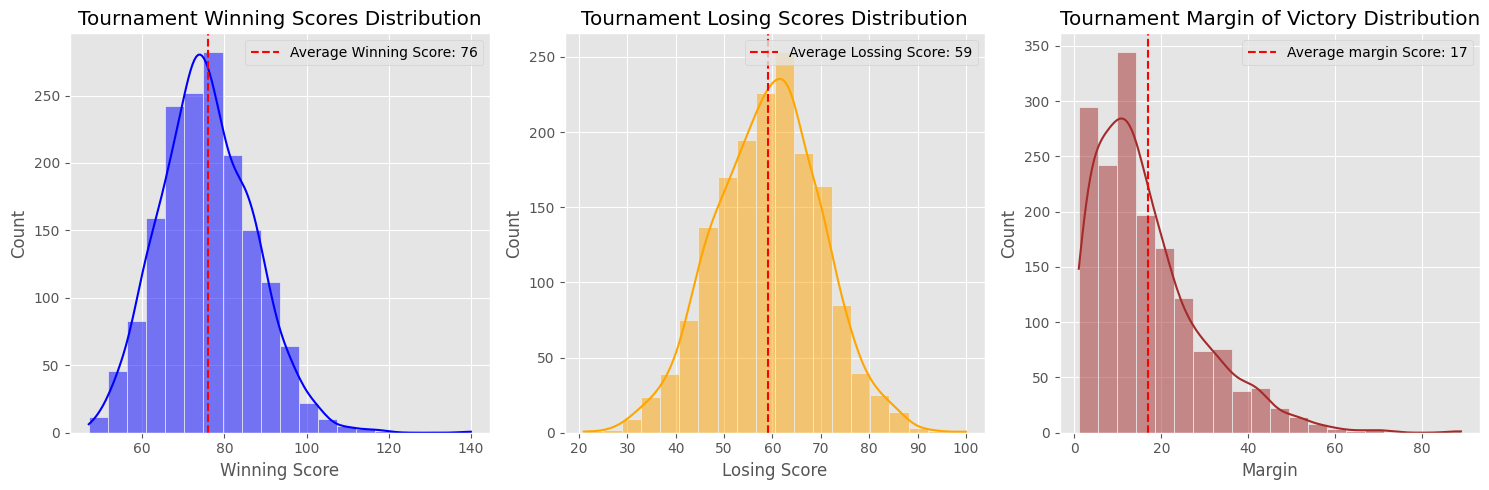

    Season  Count of Unique Teams
0     1998                     32
1     1999                     32
2     2000                     32
3     2001                     32
4     2002                     32
5     2003                     32
6     2004                     32
7     2005                     32
8     2006                     32
9     2007                     32
10    2008                     32
11    2009                     32
12    2010                     32
13    2011                     32
14    2012                     32
15    2013                     32
16    2014                     32
17    2015                     32
18    2016                     32
19    2017                     32
20    2018                     32
21    2019                     32
22    2021                     32
23    2022                     36
24    2023                     35
25    2024                     36


In [ ]:
women_tourney_results['Margin'] = women_tourney_results['WScore'] - women_tourney_results['LScore']
avgwin_score = round(women_tourney_results['WScore'].mean())

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(women_tourney_results['WScore'], kde=True, color='blue', bins=20)
plt.axvline(x=avgwin_score, color='red', linestyle='--', label=f'Average Winning Score: {avgwin_score}')
plt.title("Tournament Winning Scores Distribution")
plt.xlabel("Winning Score")
plt.legend()

avgloss_score = round(women_tourney_results['LScore'].mean())
plt.subplot(1, 3, 2)
sns.histplot(women_tourney_results['LScore'], kde=True, color='orange', bins=20)
plt.axvline(x=avgloss_score, color='red', linestyle='--', label=f'Average Lossing Score: {avgloss_score}')
plt.title("Tournament Losing Scores Distribution")
plt.xlabel("Losing Score")
plt.legend()

avgmargin_scr = round(women_tourney_results['Margin'].mean())
plt.subplot(1, 3, 3)
sns.histplot(women_tourney_results['Margin'], kde=True, color='brown', bins=20)
plt.axvline(x=avgmargin_scr, color='red', linestyle='--', label=f'Average margin Score: {avgmargin_scr}')
plt.title("Tournament Margin of Victory Distribution")
plt.xlabel("Margin")
plt.legend()

plt.tight_layout()
plt.show()

unique_teams = women_tourney_results.groupby('Season')['WTeamID'].nunique()
unique_teams_df = unique_teams.reset_index(name='Count of Unique Teams')
print(unique_teams_df)


Graph 1: *Tournament Winning Score (Blue):* Tournament winners often score in the 70 - 80.  
Graph 2: *Tournament Losing Score (Orange):* Tournament losers usually fall in the high 50s to 55 to 65 range.  
Graph 3: *Tournament Margin (Brown):* Tournament games are often decided by around 10 - 20 points on average.

In [42]:
women_tourney_results.describe(include='all')

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,Margin
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650,1650.000000,1650.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,853,NaN,NaN
mean,2010.743636,140.680000,3285.878788,75.750303,3287.456364,59.164848,NaN,0.024242,16.585455
std,7.776383,4.044855,97.116198,11.331146,99.845312,10.990518,NaN,0.165250,12.467750
min,1998.000000,135.000000,3104.000000,47.000000,3101.000000,21.000000,NaN,0.000000,1.000000
25%,2004.000000,138.000000,3200.000000,68.000000,3208.000000,52.000000,NaN,0.000000,7.000000
50%,2011.000000,139.000000,3280.000000,75.000000,3281.000000,59.000000,NaN,0.000000,14.000000
75%,2017.000000,141.000000,3376.000000,83.000000,3377.000000,67.000000,NaN,0.000000,22.000000


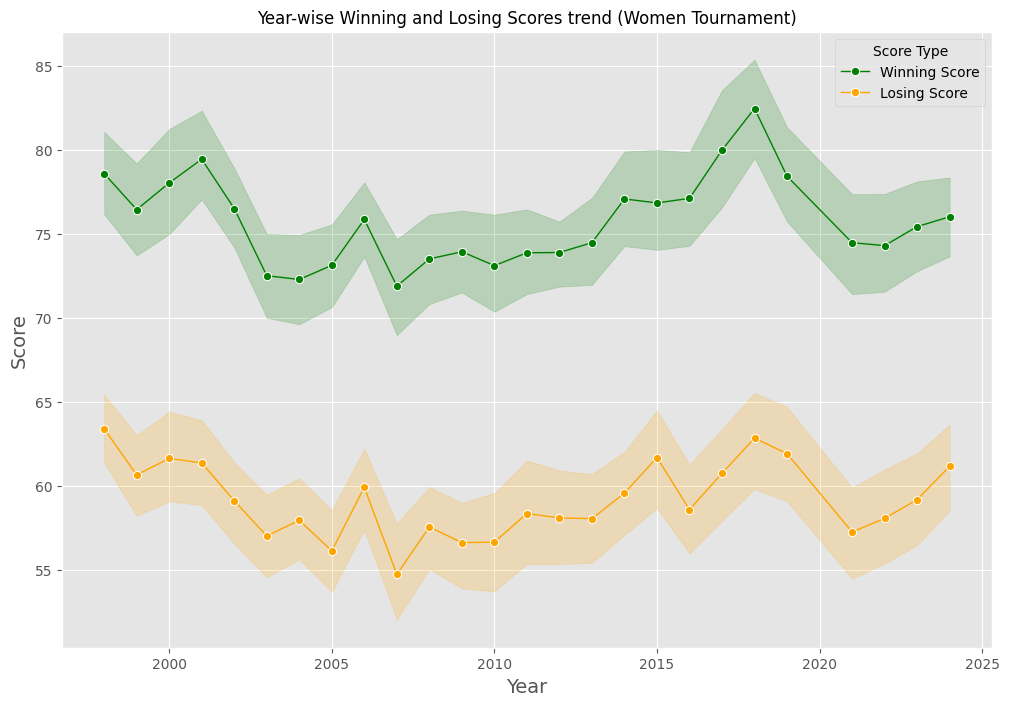

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Season', y='WScore', data=women_tourney_results, label='Winning Score', marker='o', color='green', lw=1)
sns.lineplot(x='Season', y='LScore', data=women_tourney_results, label='Losing Score', marker='o', color='orange', lw=1)

plt.title("Year-wise Winning and Losing Scores trend (Women Tournament)", fontsize=12)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.legend(title="Score Type")
plt.show()

### Merge Regular Season and Tournery Compact results for women

In [44]:
women_regular_results["type"] = "regular"
women_tourney_results["type"] = "tournament"

common_col = set(women_regular_results.columns).intersection(set(women_tourney_results.columns))
women_regular_results = women_regular_results[list(common_col)]
women_tourney_results = women_tourney_results[list(common_col)]
print(f'Common Columns: {common_col}')

w_combined = pd.concat([women_regular_results, women_tourney_results], ignore_index=True)
w_combined

Common Columns: {'type', 'LScore', 'DayNum', 'Margin', 'NumOT', 'WLoc', 'LTeamID', 'Season', 'WTeamID', 'WScore'}


,type,LScore,DayNum,Margin,NumOT,WLoc,LTeamID,Season,WTeamID,WScore
0,regular,41,18,50,0,H,3202,1998,3104,91
1,regular,76,18,11,0,H,3221,1998,3163,87
2,regular,59,18,7,0,H,3261,1998,3222,66
3,regular,62,18,7,0,H,3365,1998,3307,69
4,regular,35,18,80,0,H,3411,1998,3349,115
...,...,...,...,...,...,...,...,...,...,...
138673,tournament,73,147,7,0,A,3425,2024,3163,80
138674,tournament,87,147,7,0,H,3261,2024,3234,94
138675,tournament,69,151,2,0,N,3163,2024,3234,71
138676,tournament,59,151,19,0,N,3301,2024,3376,78


In [45]:
d_types_report(w_combined)

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,type,object,"[regular, tournament]",2,0,0.0
1,LScore,int64,"[41, 76, 59, 62, 35]",103,0,0.0
2,DayNum,int64,"[18, 19, 20, 21, 22]",149,0,0.0
3,Margin,int64,"[50, 11, 7, 80, 2]",94,0,0.0
4,NumOT,int64,"[0, 1, 3, 2, 4]",6,0,0.0
5,WLoc,object,"[H, A, N]",3,0,0.0
6,LTeamID,int64,"[3202, 3221, 3261, 3365, 3411]",369,0,0.0
7,Season,int64,"[1998, 1999, 2000, 2001, 2002]",28,0,0.0
8,WTeamID,int64,"[3104, 3163, 3222, 3307, 3349]",369,0,0.0
9,WScore,int64,"[91, 87, 66, 69, 115]",105,0,0.0


## Merging Men and Women compact result details (both regular season and tournament result)

In [ ]:
w_combined["gender"] = "w"
m_combined["gender"] = "m"
season_tournament_compact_result = pd.concat([w_combined, m_combined], ignore_index=True)

season_tournament_compact_result = season_tournament_compact_result.drop(['NumOT'], axis=1)
year_start = 1985
season_tournament_compact_result['day'] = (season_tournament_compact_result['Season'] - year_start) * 365 + season_tournament_compact_result['DayNum']

def season_phase(day_num):
    if day_num <= 50:
        return 'early'
    elif day_num <= 100:
        return 'mid'
    else:
        return 'late'

season_tournament_compact_result['season_phase'] = season_tournament_compact_result['DayNum'].apply(season_phase)

season_tournament_compact_result = season_tournament_compact_result.sort_values(by='day', ascending=True)


final_data.to_csv('season_tournament_compact_result.csv', index=False)
season_tournament_compact_result

,type,LScore,DayNum,Margin,WLoc,LTeamID,Season,WTeamID,WScore,gender,day,season_phase
138678,regular,64,20,17,N,1328,1985,1228,81,m,20,early
138690,regular,72,25,19,H,1411,1985,1374,91,m,25,early
138692,regular,58,25,29,H,1225,1985,1417,87,m,25,early
138691,regular,65,25,5,N,1397,1985,1412,70,m,25,early
138680,regular,56,25,7,H,1223,1985,1112,63,m,25,early
...,...,...,...,...,...,...,...,...,...,...,...,...
137026,regular,62,132,21,N,3125,2025,3293,83,w,14732,late
331607,regular,84,132,6,N,1165,2025,1463,90,m,14732,late
331605,regular,53,132,6,N,1458,2025,1276,59,m,14732,late
331603,regular,77,132,9,N,1397,2025,1196,86,m,14732,late


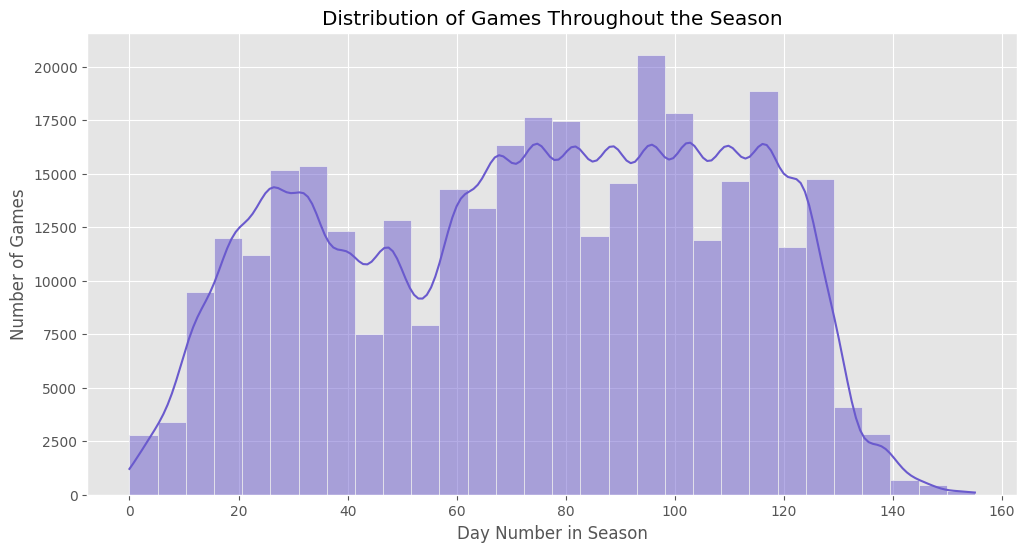

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(season_tournament_compact_result['DayNum'], bins=30, kde=True, color='slateblue')
plt.title("Distribution of Games Throughout the Season")
plt.xlabel("Day Number in Season")
plt.ylabel("Number of Games")
plt.show()


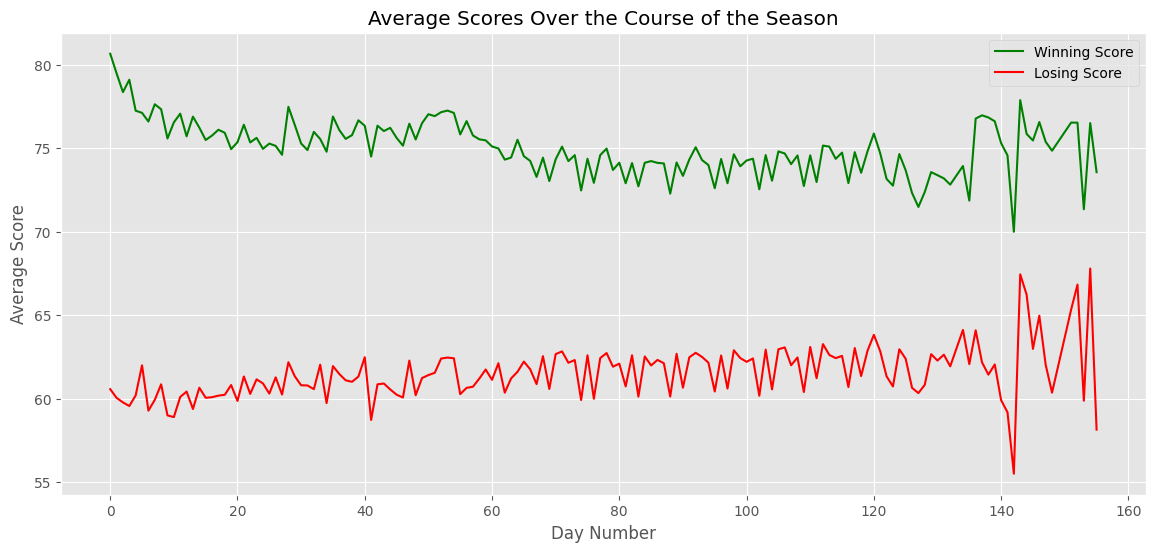

In [ ]:
avg_scores_by_day = season_tournament_compact_result.groupby('DayNum')[['WScore', 'LScore']].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=avg_scores_by_day, x='DayNum', y='WScore', label='Winning Score', color='green')
sns.lineplot(data=avg_scores_by_day, x='DayNum', y='LScore', label='Losing Score', color='red')
plt.title("Average Scores Over the Course of the Season")
plt.xlabel("Day Number")
plt.ylabel("Average Score")
plt.legend()
plt.grid(True)
plt.show()

In [49]:
d_types_report(season_tournament_compact_result)

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,type,object,"[regular, tournament]",2,0,0.0
1,LScore,int64,"[64, 72, 58, 65, 56]",126,0,0.0
2,DayNum,int64,"[20, 25, 26, 27, 28]",153,0,0.0
3,Margin,int64,"[17, 19, 29, 5, 7]",96,0,0.0
4,WLoc,object,"[N, H, A]",3,0,0.0
5,LTeamID,int64,"[1328, 1411, 1225, 1397, 1223]",749,0,0.0
6,Season,int64,"[1985, 1986, 1987, 1988, 1989]",41,0,0.0
7,WTeamID,int64,"[1228, 1374, 1417, 1412, 1112]",749,0,0.0
8,WScore,int64,"[81, 91, 87, 70, 63]",132,0,0.0
9,gender,object,"[m, w]",2,0,0.0


In [ ]:
def generate_team_season_stats(df):    
    win_df = df[['Season', 'WTeamID', 'WScore', 'LScore', 'DayNum', 'type', 'gender']].copy()
    win_df.rename(columns={
        'WTeamID': 'TeamID',
        'WScore': 'TeamScore',
        'LScore': 'OppScore'
    }, inplace=True)
    win_df['Result'] = 1

    loss_df = df[['Season', 'LTeamID', 'LScore', 'WScore', 'DayNum', 'type', 'gender']].copy()
    loss_df.rename(columns={
        'LTeamID': 'TeamID',
        'LScore': 'TeamScore',
        'WScore': 'OppScore'
    }, inplace=True)
    loss_df['Result'] = 0

    full_df = pd.concat([win_df, loss_df])

    team_stats = full_df.groupby(['Season', 'TeamID']).agg({
        'Result': ['sum', 'count'],  # Wins, Games
        'TeamScore': 'mean',
        'OppScore': 'mean',
        'DayNum': 'mean',
        'type': lambda x: (x == 'tournament').sum(),  # Tourney games
        'gender': 'first'
    }).reset_index()

    team_stats.columns = ['Season', 'TeamID', 'Wins', 'GamesPlayed', 'AvgScore', 'AvgOppScore', 'AvgDayNum', 'TourneyGames', 'Gender']
    team_stats['WinRatio'] = team_stats['Wins'] / team_stats['GamesPlayed']
    team_stats['AvgMargin'] = team_stats['AvgScore'] - team_stats['AvgOppScore']

    return team_stats


In [ ]:
team_stats_df = generate_team_season_stats(season_tournament_compact_result)
team_stats_df.to_csv('team_stats_df.csv', index=False)
team_stats_df

,Season,TeamID,Wins,GamesPlayed,AvgScore,AvgOppScore,AvgDayNum,TourneyGames,Gender,WinRatio,AvgMargin
0,1985,1102,5,24,63.083333,68.875000,83.833333,0,m,0.208333,-5.791667
1,1985,1103,9,23,61.043478,64.086957,84.043478,0,m,0.391304,-3.043478
2,1985,1104,23,33,67.363636,60.060606,86.909091,3,m,0.696970,7.303030
3,1985,1106,10,24,71.625000,75.416667,82.625000,0,m,0.416667,-3.791667
4,1985,1108,19,25,83.000000,75.040000,89.440000,0,m,0.760000,7.960000
...,...,...,...,...,...,...,...,...,...,...,...
22871,2025,3476,16,31,63.838710,66.483871,70.387097,0,w,0.516129,-2.645161
22872,2025,3477,5,27,60.888889,72.185185,68.740741,0,w,0.185185,-11.296296
22873,2025,3478,7,31,53.870968,68.967742,67.290323,0,w,0.225806,-15.096774
22874,2025,3479,6,24,62.791667,70.500000,65.041667,0,w,0.250000,-7.708333


In [52]:
d_types_report(team_stats_df)

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,Season,int64,"[1985, 1986, 1987, 1988, 1989]",41,0,0.0
1,TeamID,int64,"[1102, 1103, 1104, 1106, 1108]",749,0,0.0
2,Wins,int64,"[5, 9, 23, 10, 19]",41,0,0.0
3,GamesPlayed,int64,"[24, 23, 33, 25, 28]",38,0,0.0
4,AvgScore,float64,"[63.083333333333336, 61.04347826086956, 67.363...",7777,0,0.0
5,AvgOppScore,float64,"[68.875, 64.08695652173913, 60.06060606060606,...",7440,0,0.0
6,AvgDayNum,float64,"[83.83333333333333, 84.04347826086956, 86.9090...",6866,0,0.0
7,TourneyGames,int64,"[0, 3, 1, 2, 6]",7,0,0.0
8,Gender,object,"[m, w]",2,0,0.0
9,WinRatio,float64,"[0.20833333333333334, 0.391304347826087, 0.696...",386,0,0.0


In [ ]:
win_features = season_tournament_detailed_result[['Season', 'WTeamID', 
                                                 'Possession_Control', 
                                                 'Shooting_Efficiency', 
                                                 'Assist_Ratio', 
                                                 'Balanced_Score']].copy()

win_features.rename(columns={
    'WTeamID': 'TeamID'
}, inplace=True)

merged_df = pd.merge(team_stats_df, win_features, how='left', on=['Season', 'TeamID'])
merged_df

,Season,TeamID,Wins,GamesPlayed,AvgScore,AvgOppScore,AvgDayNum,TourneyGames,Gender,WinRatio,AvgMargin,Possession_Control,Shooting_Efficiency,Assist_Ratio,Balanced_Score
0,1985,1102,5,24,63.083333,68.875000,83.833333,0,m,0.208333,-5.791667,NaN,NaN,NaN,NaN
1,1985,1103,9,23,61.043478,64.086957,84.043478,0,m,0.391304,-3.043478,NaN,NaN,NaN,NaN
2,1985,1104,23,33,67.363636,60.060606,86.909091,3,m,0.696970,7.303030,NaN,NaN,NaN,NaN
3,1985,1106,10,24,71.625000,75.416667,82.625000,0,m,0.416667,-3.791667,NaN,NaN,NaN,NaN
4,1985,1108,19,25,83.000000,75.040000,89.440000,0,m,0.760000,7.960000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212183,2025,3480,11,28,65.464286,70.750000,68.428571,0,w,0.392857,-5.285714,16.0,0.509091,0.258065,6.655249
212184,2025,3480,11,28,65.464286,70.750000,68.428571,0,w,0.392857,-5.285714,21.0,0.608696,0.368421,8.717162
212185,2025,3480,11,28,65.464286,70.750000,68.428571,0,w,0.392857,-5.285714,33.0,0.466165,0.371429,13.460752
212186,2025,3480,11,28,65.464286,70.750000,68.428571,0,w,0.392857,-5.285714,34.0,0.467742,0.419355,13.870968


In [ ]:
merged_df = merged_df.round(2)
merged_df.fillna(0, inplace=True)
merged_df.drop(columns=['Season', 'AvgOppScore','TourneyGames'], inplace=True)
d_types_report(merged_df)

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,TeamID,int64,"[1102, 1103, 1104, 1106, 1108]",749,0,0.0
1,Wins,int64,"[5, 9, 23, 10, 19]",41,0,0.0
2,GamesPlayed,int64,"[24, 23, 33, 25, 28]",38,0,0.0
3,AvgScore,float64,"[63.08, 61.04, 67.36, 71.62, 83.0]",3318,0,0.0
4,AvgDayNum,float64,"[83.83, 84.04, 86.91, 82.62, 89.44]",2854,0,0.0
5,Gender,object,"[m, w]",2,0,0.0
6,WinRatio,float64,"[0.21, 0.39, 0.7, 0.42, 0.76]",96,0,0.0
7,AvgMargin,float64,"[-5.79, -3.04, 7.3, -3.79, 7.96]",3474,0,0.0
8,Possession_Control,float64,"[0.0, 24.0, 22.0, 19.0, 16.0]",80,0,0.0
9,Shooting_Efficiency,float64,"[0.0, 0.73, 0.61, 0.75, 0.69]",65,0,0.0


In [ ]:
numeric_cols = merged_df.select_dtypes(include='number').columns.drop(['TeamID'])

team_aggregated = merged_df.groupby(['TeamID', 'Gender'])[numeric_cols].agg({
    'Wins': 'sum',
    'GamesPlayed': 'sum',
    'AvgScore': ['mean', 'std'],
    'AvgDayNum': 'mean',
    'WinRatio': ['mean', 'std'],
    'AvgMargin': ['mean', 'std'],
    'Possession_Control': ['mean', 'std'],
    'Shooting_Efficiency': ['mean', 'std'],
    'Assist_Ratio': ['mean', 'std'],
    'Balanced_Score': ['mean', 'std']
}).reset_index()

team_aggregated.columns = ['_'.join(col).strip('_') for col in team_aggregated.columns.values]

team_aggregated = team_aggregated.round(2)

print("✅ Aggregated dataset shape:", team_aggregated.shape)
team_aggregated


✅ Aggregated dataset shape: (749, 19)


,TeamID,Gender,Wins_sum,GamesPlayed_sum,AvgScore_mean,AvgScore_std,AvgDayNum_mean,WinRatio_mean,WinRatio_std,AvgMargin_mean,AvgMargin_std,Possession_Control_mean,Possession_Control_std,Shooting_Efficiency_mean,Shooting_Efficiency_std,Assist_Ratio_mean,Assist_Ratio_std,Balanced_Score_mean,Balanced_Score_std
0,1101,m,2351,4248,70.72,3.05,74.51,0.55,0.18,1.20,6.61,27.93,6.46,0.57,0.06,0.36,0.10,11.47,2.58
1,1102,m,4178,8802,63.90,4.50,71.96,0.47,0.17,-0.31,6.45,24.14,9.10,0.57,0.16,0.40,0.15,9.97,3.68
2,1103,m,10228,15332,72.46,4.30,76.54,0.66,0.11,5.13,3.50,28.44,8.54,0.55,0.13,0.35,0.12,11.67,3.44
3,1104,m,9774,15495,74.19,7.77,74.69,0.63,0.10,5.21,3.89,31.41,9.30,0.54,0.13,0.32,0.12,12.85,3.75
4,1105,m,2021,5571,65.68,4.13,78.40,0.36,0.10,-5.08,3.87,30.98,7.95,0.52,0.09,0.32,0.11,12.66,3.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,3476,w,336,840,60.85,4.15,67.18,0.40,0.15,-5.70,4.87,24.14,6.97,0.54,0.07,0.49,0.10,9.97,2.78
745,3477,w,363,928,65.28,2.40,74.20,0.39,0.09,-6.67,2.19,31.39,7.41,0.51,0.05,0.32,0.10,12.82,2.96
746,3478,w,373,793,56.15,1.45,67.10,0.47,0.15,-6.55,5.44,29.08,7.78,0.51,0.07,0.37,0.12,11.91,3.09
747,3479,w,36,144,62.79,0.00,65.04,0.25,0.00,-7.71,0.00,22.17,5.74,0.56,0.05,0.30,0.08,9.15,2.29


In [56]:
d_types_report(team_aggregated)

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,TeamID,int64,"[1101, 1102, 1103, 1104, 1105]",749,0,0.000000
1,Gender,object,"[m, w]",2,0,0.000000
2,Wins_sum,int64,"[2351, 4178, 10228, 9774, 2021]",720,0,0.000000
3,GamesPlayed_sum,int64,"[4248, 8802, 15332, 15495, 5571]",730,0,0.000000
4,AvgScore_mean,float64,"[70.72, 63.9, 72.46, 74.19, 65.68]",613,0,0.000000
5,AvgScore_std,float64,"[3.05, 4.5, 4.3, 7.77, 4.13]",365,3,0.400534
6,AvgDayNum_mean,float64,"[74.51, 71.96, 76.54, 74.69, 78.4]",522,0,0.000000
7,WinRatio_mean,float64,"[0.55, 0.47, 0.66, 0.63, 0.36]",68,0,0.000000
8,WinRatio_std,float64,"[0.18, 0.17, 0.11, 0.1, 0.14]",23,3,0.400534
9,AvgMargin_mean,float64,"[1.2, -0.31, 5.13, 5.21, -5.08]",613,0,0.000000


## Feature Engineering Final

In [ ]:
submission_df = pd.read_csv("ML_dataset/SampleSubmissionStage2.csv")

submission_df[['Season', 'WTeamID', 'LTeamID']] = submission_df['ID'].str.split('_', expand=True)
submission_df['WTeamID'] = submission_df['WTeamID'].astype(int)
submission_df['LTeamID'] = submission_df['LTeamID'].astype(int)
submission_df['gender'] = submission_df['WTeamID'].apply(lambda x: 'm' if 1000 <= x < 2000 else 'w')
submission_df = submission_df.drop(['Pred', 'ID','Season'], axis=1)
submission_df

,WTeamID,LTeamID,gender
0,1101,1102,m
1,1101,1103,m
2,1101,1104,m
3,1101,1105,m
4,1101,1106,m
...,...,...,...
131402,3477,3479,w
131403,3477,3480,w
131404,3478,3479,w
131405,3478,3480,w


In [59]:
d_types_report(submission_df)

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,WTeamID,int64,"[1101, 1102, 1103, 1104, 1105]",724,0,0.0
1,LTeamID,int64,"[1102, 1103, 1104, 1105, 1106]",724,0,0.0
2,gender,object,"[m, w]",2,0,0.0


In [ ]:
winner_stats = team_aggregated.copy().add_suffix('_w')  
submission_df = submission_df.merge(
    winner_stats,
    left_on=['WTeamID', 'gender'], 
    right_on=['TeamID_w', 'Gender_w'],
    how='left'  
)

loser_stats = team_aggregated.copy().add_suffix('_l')  
submission_df = submission_df.merge(
    loser_stats,
    left_on=['LTeamID', 'gender'],  
    right_on=['TeamID_l', 'Gender_l'],
    how='left'  
)

submission_df.drop(columns=['TeamID_w', 'TeamID_l', 'Gender_w', 'Gender_l'], inplace=True)

print("✅ Merged sample dataset shape:", submission_df.shape)
submission_df


✅ Merged sample dataset shape: (131407, 37)


,WTeamID,LTeamID,gender,Wins_sum_w,GamesPlayed_sum_w,AvgScore_mean_w,AvgScore_std_w,AvgDayNum_mean_w,WinRatio_mean_w,WinRatio_std_w,...,AvgMargin_mean_l,AvgMargin_std_l,Possession_Control_mean_l,Possession_Control_std_l,Shooting_Efficiency_mean_l,Shooting_Efficiency_std_l,Assist_Ratio_mean_l,Assist_Ratio_std_l,Balanced_Score_mean_l,Balanced_Score_std_l
0,1101,1102,m,2351,4248,70.72,3.05,74.51,0.55,0.18,...,-0.31,6.45,24.14,9.10,0.57,0.16,0.40,0.15,9.97,3.68
1,1101,1103,m,2351,4248,70.72,3.05,74.51,0.55,0.18,...,5.13,3.50,28.44,8.54,0.55,0.13,0.35,0.12,11.67,3.44
2,1101,1104,m,2351,4248,70.72,3.05,74.51,0.55,0.18,...,5.21,3.89,31.41,9.30,0.54,0.13,0.32,0.12,12.85,3.75
3,1101,1105,m,2351,4248,70.72,3.05,74.51,0.55,0.18,...,-5.08,3.87,30.98,7.95,0.52,0.09,0.32,0.11,12.66,3.19
4,1101,1106,m,2351,4248,70.72,3.05,74.51,0.55,0.18,...,-2.56,4.73,28.89,10.26,0.50,0.14,0.30,0.13,11.82,4.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131402,3477,3479,w,363,928,65.28,2.40,74.20,0.39,0.09,...,-7.71,0.00,22.17,5.74,0.56,0.05,0.30,0.08,9.15,2.29
131403,3477,3480,w,363,928,65.28,2.40,74.20,0.39,0.09,...,-5.29,0.00,26.55,6.17,0.51,0.05,0.32,0.07,10.89,2.47
131404,3478,3479,w,373,793,56.15,1.45,67.10,0.47,0.15,...,-7.71,0.00,22.17,5.74,0.56,0.05,0.30,0.08,9.15,2.29
131405,3478,3480,w,373,793,56.15,1.45,67.10,0.47,0.15,...,-5.29,0.00,26.55,6.17,0.51,0.05,0.32,0.07,10.89,2.47


In [61]:
d_types_report(submission_df)

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,WTeamID,int64,"[1101, 1102, 1103, 1104, 1105]",724,0,0.0
1,LTeamID,int64,"[1102, 1103, 1104, 1105, 1106]",724,0,0.0
2,gender,object,"[m, w]",2,0,0.0
3,Wins_sum_w,int64,"[2351, 4178, 10228, 9774, 2021]",695,0,0.0
4,GamesPlayed_sum_w,int64,"[4248, 8802, 15332, 15495, 5571]",706,0,0.0
5,AvgScore_mean_w,float64,"[70.72, 63.9, 72.46, 74.19, 65.68]",595,0,0.0
6,AvgScore_std_w,float64,"[3.05, 4.5, 4.3, 7.77, 4.13]",354,0,0.0
7,AvgDayNum_mean_w,float64,"[74.51, 71.96, 76.54, 74.69, 78.4]",505,0,0.0
8,WinRatio_mean_w,float64,"[0.55, 0.47, 0.66, 0.63, 0.36]",60,0,0.0
9,WinRatio_std_w,float64,"[0.18, 0.17, 0.11, 0.1, 0.14]",22,0,0.0


In [62]:
submission_df.to_csv('submission_df.csv', index=False)